In [1]:
# import considering_upvote

In [2]:
def text_prep(x):
    return x
import aes2_preproces_cache_vectorize
TUNE = False

CUDA_AVAILABLE = True


2024-06-30 09:47:40.873287: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-30 09:47:40.873433: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-30 09:47:41.008889: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [3]:
import gc

gc.collect()

829

In [4]:
aes2_preproces_cache_vectorize.a

2.998

In [5]:
import pickle

with open("/kaggle/usr/lib/aes2-added-fb-prize-as-features-preprocessing/train_feats.pickle", "rb") as f:
    train_feats = pickle.load(f)
with open("/kaggle/usr/lib/aes2-added-fb-prize-as-features-preprocessing/X.pickle", "rb") as f:
    X = pickle.load(f)
with open("/kaggle/usr/lib/aes2-added-fb-prize-as-features-preprocessing/y.pickle", "rb") as f:
    y = pickle.load(f)
with open("/kaggle/usr/lib/aes2-added-fb-prize-as-features-preprocessing/y_split.pickle", "rb") as f:
    y_split = pickle.load(f)
with open(
    "/kaggle/input/aes2-eval-added-fb-prize-as-features-8168c5/feature_select.pickle", "rb"
) as f:
    feature_select = pickle.load(f)
    
aes2_preproces_cache_vectorize.feature_select = feature_select

In [6]:
# train_feats["max_repeated_word_count"] = train_feats[train_feats.columns[train_feats.columns.str.startswith("tfid_cnt_")]].max(axis=1)

In [7]:
import numpy as np

# X = train_feats[feature_select + ["max_repeated_word_count"]].astype(np.float32).values
X = train_feats[feature_select].astype(np.float32).values

fold 1


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 75 rounds
[100]	train's QWK: 0.441957	valid's QWK: 0.445645
[200]	train's QWK: 0.706039	valid's QWK: 0.713271
[300]	train's QWK: 0.758577	valid's QWK: 0.758278
[400]	train's QWK: 0.78155	valid's QWK: 0.775783
[500]	train's QWK: 0.802852	valid's QWK: 0.797138
[600]	train's QWK: 0.815967	valid's QWK: 0.811266
[700]	train's QWK: 0.822301	valid's QWK: 0.823453
[800]	train's QWK: 0.827479	valid's QWK: 0.828467
Early stopping, best iteration is:
[764]	train's QWK: 0.826213	valid's QWK: 0.830316
Evaluated only: QWK
Light best iter: 764


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.15105	validation_0-QWK:0.46053	validation_1-rmse:1.15204	validation_1-QWK:0.41681
[0]	validation_0-rmse:1.15105	validation_0-QWK:0.46053	validation_1-rmse:1.15204	validation_1-QWK:0.41681
[100]	validation_0-rmse:0.36605	validation_0-QWK:0.90970	validation_1-rmse:0.53218	validation_1-QWK:0.84107
[100]	validation_0-rmse:0.36605	validation_0-QWK:0.90970	validation_1-rmse:0.53218	validation_1-QWK:0.84107
XGBoost best iter: 110


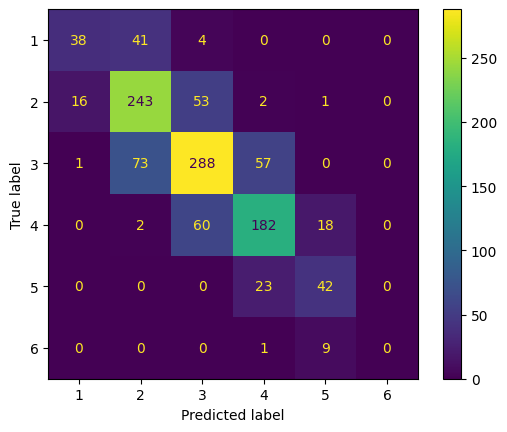

F1 score across fold: 0.6821041929296936
Cohen kappa score across fold: 0.8321029160270271


In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, cohen_kappa_score
from aes2_preproces_cache_vectorize import *

import builtins
original_print = builtins.print
def patch_print(text, *args, **kwargs):
    if not isinstance(text, str):
        return original_print(text, *args, **kwargs)
    if "	" in text:
        n = text.split("	")[0]
        try:
            n = int(n.strip("[]"))
            if n % 100 == 0:
                original_print(text)
            return None
        except:
            pass
    original_print(text, *args, **kwargs)

builtins.print = patch_print

n_splits = 15
models = []
predictions = []
f1_scores = []
kappa_scores = []


def quadratic_weighted_kappa(y_true, y_pred):
    if isinstance(y_pred, xgb.QuantileDMatrix):
        # XGB
        y_true, y_pred = y_pred, y_true

        y_true = (y_true.get_label() + a).round()
        y_pred = (y_pred + a).clip(1, 6).round()
        qwk = cohen_kappa_score(y_true, y_pred, weights="quadratic")
        return 'QWK', qwk

    else:
        # For lgb
        y_true = y_true + a
        y_pred = (y_pred + a).clip(1, 6).round()
        qwk = cohen_kappa_score(y_true, y_pred, weights="quadratic")
        return 'QWK', qwk, True
    
def qwk_obj(y_true, y_pred):
    labels = y_true + a
    preds = y_pred + a
    preds = preds.clip(1, 6)
    f = 1/2*np.sum((preds-labels)**2)
    g = 1/2*np.sum((preds-a)**2+b)
    df = preds - labels
    dg = preds - a
    grad = (df/g - f*dg/g**2)*len(labels)
    hess = np.ones(len(labels))
    return grad, hess

class Predictor:
    def __init__(self, models: list, n: float = 0.746):
        self.models = models
        self.n = n
#         self.xgb_boost_best_iter = models[1].
    def predict(self, X):
        n_models = len(self.models)
        predicted = None
        n = self.n
        for i, model in enumerate(self.models):
            if i == 0:
                predicted = n*model.predict(X)
            else:
                predicted += (1-n)*model.predict(X)
        return predicted

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
xgboost_best_iters = []
light_best_iters = []

_test = pd.read_csv("/kaggle/input/learning-agency-lab-automated-essay-scoring-2/test.csv")
ENABLE_DONT_WASTE_YOUR_RUN_TIME = len(_test) < 10
# ENABLE_DONT_WASTE_YOUR_RUN_TIME = False
oof = np.zeros(len(train), dtype='float32')
for i, (train_index, test_index) in enumerate(skf.split(X, y_split), 1):
    # Split the data into training and testing sets for this fold
    print('fold',i)
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold, y_test_fold_int = y[train_index], y[test_index], y_split[test_index]
    callbacks = [log_evaluation(period=25), early_stopping(stopping_rounds=75, first_metric_only=True)]
    light = lgb.LGBMRegressor(
            objective = qwk_obj,
            metrics = 'None',
            learning_rate = 0.0031,
            max_depth = 8,
            num_leaves = 10,
            colsample_bytree=0.3,
            reg_alpha = 0.7,
            reg_lambda = 0.1,
            n_estimators=2414,
            random_state=42,
            extra_trees=True,
            class_weight='balanced',
            device='gpu' if CUDA_AVAILABLE else 'cpu',
            verbosity = - 1
        )

    # Fit the model on the training data for this fold  
    light.fit(
        X_train_fold,
        y_train_fold,
        eval_names=['train', 'valid'],
        eval_set=[(X_train_fold, y_train_fold), (X_test_fold, y_test_fold)],
        eval_metric=quadratic_weighted_kappa,
        callbacks=callbacks
    )
    light_best_iters.append(light.best_iteration_)
    print(f"Light best iter: {light.best_iteration_}")
   
    xgb_regressor = xgb.XGBRegressor(
        objective = qwk_obj,
        verbosity = 0,
        metrics = 'None',
        learning_rate = 0.028,
        max_depth = 8,
        num_leaves = 114,
        colsample_bytree=0.5,
        reg_alpha = 0.1,
        reg_lambda = 1.6, # validation_1-QWK:0.84010
#         reg_lambda = 0.8, validation_1-QWK:0.83917
        
        n_estimators=1024,
        random_state=42,
#         gamma=0.05,
        extra_trees=True,
        scale_pos_weight=100,
        class_weight='balanced',
        tree_method="hist",
        device="gpu" if CUDA_AVAILABLE else "cpu"
    #             device='gpu',
    #             verbosity = 1
    )
    
    xgb_callbacks = [
        xgb.callback.EvaluationMonitor(period=25),
        xgb.callback.EarlyStopping(75, metric_name="QWK", maximize=True, save_best=True, data_name="validation_1")
    ]
    xgb_regressor.fit(
        X_train_fold,
        y_train_fold,
        eval_set=[(X_train_fold, y_train_fold), (X_test_fold, y_test_fold)],
        eval_metric=quadratic_weighted_kappa,
        callbacks=xgb_callbacks
    )
    print(f"XGBoost best iter: {xgb_regressor.get_booster().best_iteration}")
    xgboost_best_iters.append(xgb_regressor.get_booster().best_iteration)
    predictor = Predictor([light, xgb_regressor], n=0.709)

    models.append(predictor)
    # Make predictions on the test data for this fold
    predictions_fold = predictor.predict(X_test_fold)
    predictions_fold = predictions_fold + a
    oof[test_index] = predictions_fold
    predictions_fold = predictions_fold.clip(1, 6).round()
    predictions.append(predictions_fold)
    # Calculate and store the F1 score for this fold
    f1_fold = f1_score(y_test_fold_int, predictions_fold, average='weighted')
    f1_scores.append(f1_fold)

    # Calculate and store the Cohen's kappa score for this fold
    kappa_fold = cohen_kappa_score(y_test_fold_int, predictions_fold, weights='quadratic')
    kappa_scores.append(kappa_fold)
#         predictor.booster_.save_model(f'fold_{i}.txt')
    cm = confusion_matrix(y_test_fold_int, predictions_fold, labels=[x for x in range(1,7)])

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=[x for x in range(1,7)]
    )
    disp.plot()
    plt.show()
    print(f'F1 score across fold: {f1_fold}')
    print(f'Cohen kappa score across fold: {kappa_fold}')

    gc.collect()
    if ENABLE_DONT_WASTE_YOUR_RUN_TIME:
        break


In [9]:
def find_thresholds(true, pred, steps=50):

    # SAVE TRIALS FOR PLOTTING
    xs = [[],[],[],[],[]]
    ys = [[],[],[],[],[]]

    # COMPUTE BASELINE METRIC
    threshold = [1.5, 2.5, 3.5, 4.5, 5.5]
    pred2 = pd.cut(pred, [-np.inf] + threshold + [np.inf], 
                    labels=[1,2,3,4,5,6]).astype('int32')
    best = cohen_kappa_score(true, pred2, weights="quadratic")

    # FIND FIVE OPTIMAL THRESHOLDS
    for k in range(5):
        for sign in [1,-1]:
            v = threshold[k]
            threshold2 = threshold.copy()
            stop = 0
            while stop<steps:
                # TRY NEW THRESHOLD
                v += sign * 0.01
                threshold2[k] = v
                pred2 = pd.cut(pred, [-np.inf] + threshold2 + [np.inf], 
                                labels=[1,2,3,4,5,6]).astype('int32')
                metric = cohen_kappa_score(true, pred2, weights="quadratic")

                # SAVE TRIALS FOR PLOTTING
                xs[k].append(v)
                ys[k].append(metric)

                # EARLY STOPPING
                if metric<=best:
                    stop += 1
                else:
                    stop = 0
                    best = metric
                    threshold = threshold2.copy()

    # COMPUTE FINAL METRIC
    pred2 = pd.cut(pred, [-np.inf] + threshold + [np.inf], 
                    labels=[1,2,3,4,5,6]).astype('int32')
    best = cohen_kappa_score(true, pred2, weights="quadratic")   

    # RETURN RESULTS
    threshold = [np.round(t,3) for t in threshold]
    return best, threshold, xs, ys

# best, thresholds, xs, ys = find_thresholds(y_split, oof, steps=500)
# print('Best thresholds are:', thresholds )
# print('=> achieve Overall CV QWK score =', best )

thresholds = [1.51, 2.6, 3.5, 4.59, 5.56]

In [10]:
if TUNE:
    import optuna

    def objective(trial):
        xgb_regressor = xgb.XGBRegressor(
            objective = qwk_obj,
            verbosity = 0,
            metrics = 'None',
            learning_rate = 0.1,
            max_depth = 8,
            num_leaves = 10,
            colsample_bytree=0.5,
            reg_alpha = 0.1,
            reg_lambda = trial.suggest_float('reg_lambda', 0, 2, step=0.05),
    #         reg_lambda = 1.0, # validation_1-QWK:0.84010
    #         reg_lambda = 0.8, validation_1-QWK:0.83917

            n_estimators=1024,
            random_state=42,
    #         gamma=0.05,
            extra_trees=True,
            scale_pos_weight=100,
            class_weight='balanced',
            tree_method="hist",
            device="gpu" if CUDA_AVAILABLE else "cpu"
        #             device='gpu',
        #             verbosity = 1
        )

        xgb_callbacks = [
            xgb.callback.EvaluationMonitor(period=25),
            xgb.callback.EarlyStopping(175, metric_name="QWK", maximize=True, save_best=True, data_name="validation_1")
        ]
        predictor = xgb_regressor.fit(
            X_train_fold,
            y_train_fold,
            eval_set=[(X_train_fold, y_train_fold), (X_test_fold, y_test_fold)],
            eval_metric=quadratic_weighted_kappa,
            callbacks=xgb_callbacks
        )

        predictions_fold = predictor.predict(X_test_fold)
        predictions_fold = predictions_fold + a
        predictions_fold = predictions_fold.clip(1, 6).round()
        predictions.append(predictions_fold)
        # Calculate and store the F1 score for this fold


        # Calculate and store the Cohen's kappa score for this fold
        kappa_fold = cohen_kappa_score(y_test_fold_int, predictions_fold, weights='quadratic')
        return kappa_fold

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100)



    print(f"{study.best_params=}")

    with open("optuna_study.pickle", "wb") as f:
        pickle.dump(study, f)

In [11]:
with open("models.pickle", "wb") as f:
    pickle.dump(models, f)

In [12]:
mean_f1_score = np.mean(f1_scores)
mean_kappa_score = np.mean(kappa_scores)
# Print the mean scores
print(f'Mean F1 score across {n_splits} folds: {mean_f1_score}')
print(f'Mean Cohen kappa score across {n_splits} folds: {mean_kappa_score}')
print(f"XGBoost mean best iters: {sum(xgboost_best_iters)/len(xgboost_best_iters)}")
print(f"LightBoost mean best iters: {sum(light_best_iters)/len(light_best_iters)}")

Mean F1 score across 15 folds: 0.6821041929296936
Mean Cohen kappa score across 15 folds: 0.8321029160270271
XGBoost mean best iters: 110.0
LightBoost mean best iters: 764.0


In [13]:
from aes2_preproces_cache_vectorize import preprocess_test, infer

test_feats = preprocess_test()

def infer(test_feats, models):
    probabilities = []
    for model in models:
        proba = model.predict(test_feats) + a
        probabilities.append(proba)
        del model
        gc.collect()

    # Compute the average probabilities across all models
    predictions = np.mean(probabilities, axis=0)
    predictions = pd.cut(predictions, [-np.inf] + thresholds + [np.inf], 
                    labels=[1,2,3,4,5,6]).astype('int32')



    # Print the predictions
    print(predictions)

    submission = pd.read_csv("/kaggle/input/learning-agency-lab-automated-essay-scoring-2/sample_submission.csv")
    submission['score'] = predictions
    submission['score'] = submission['score'].astype(int)
    submission.to_csv("submission.csv", index=None)
    return submission


submission = infer(
    test_feats[feature_select].astype(np.float32),
    models
)
display(submission.head())

  0%|          | 0/3 [00:00<?, ?ex/s]

/opt/conda/lib/python3.10/site-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


tokenizers.__version__: 0.15.2
transformers.__version__: 4.38.2


Model: microsoft/deberta-v3-large Score: 0.4569  Scores: [0.4881251563991662, 0.45350791183634237, 0.4167653497073674, 0.4555629168241569, 0.47309887903749326, 0.4544346186864903]


0    000d118
1    000fe60
2    001ab80
Name: text_id, dtype: object
0    000d118
1    000fe60
2    001ab80
Name: text_id, dtype: object
CustomModel(
  (model): DebertaV2Model(
    (embeddings): DebertaV2Embeddings(
      (word_embeddings): Embedding(128100, 1024, padding_idx=0)
      (LayerNorm): LayerNorm((1024,), eps=1e-07, elementwise_affine=True)
      (dropout): StableDropout()
    )
    (encoder): DebertaV2Encoder(
      (layer): ModuleList(
        (0-23): 24 x DebertaV2Layer(
          (attention): DebertaV2Attention(
            (self): DisentangledSelfAttention(
              (query_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (key_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (value_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (pos_dropout): StableDropout()
              (dropout): StableDropout()
            )
            (output): DebertaV2SelfOutput(
              (dense): Linear(i

  0%|          | 0/1 [00:00<?, ?it/s]

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/opt/conda/lib/python3.10/multiprocessing/connection.py", line 177, in close
    reader_close()
  File "/opt/conda/lib/python3.10/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/opt/conda/lib/python3.10/multiprocessing/connection.py", line 361, in _close
    self._close()
  File "/opt/conda/lib/python3.10/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    _close(self._handle)


Features number:  21911
[2 3 4]


,essay_id,score
0,000d118,2
1,000fe60,3
2,001ab80,4


In [14]:
# 